# BigMart Sales Prediction

![](https://www.analyticsvidhya.com/wp-content/uploads/2016/02/Comp-4.jpg)

## Objective

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store (each row of data).

__So the idea is to find out the features (properties) of a product, and store which impacts the sales of a product.__






## Dataset Details

![](https://i.imgur.com/WlgNuFs.png)

## Get the Dataset

Downloading dataset from [this link](https://drive.google.com/file/d/1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8/view?usp=sharing).

In [ ]:
!gdown --id 1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8

Downloading...
From: https://drive.google.com/uc?id=1xFDvCOLa_gu34CosX8kSCIqqhD-E2te8
To: /content/sales_prediction.csv
100% 870k/870k [00:00<00:00, 5.30MB/s]


## Load Dataset

In [ ]:
import pandas as pd
df = pd. read_csv('sales_prediction.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Prepare training and test datasets

In [ ]:
X = df.drop(columns=['Item_Outlet_Sales'])
y = df [ 'Item_Outlet_Sales']
SEED=42

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=SEED)
X_train.shape, X_test.shape

((5966, 11), (2557, 11))

In [ ]:
X_train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Fruits and Vegetables,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Household,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Breads,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
y_train.head(3)

1921     117.8466
655     1230.3984
2229    4933.5780
Name: Item_Outlet_Sales, dtype: float64

### Data Wrangling + EDA + Feature Engineering

In [ ]:
# make data copy to do explorations modifications
X_train_c = X_train.copy()

### Basic EDA

In [ ]:
X_train_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5966 non-null   object 
 1   Item_Weight                4943 non-null   float64
 2   Item_Fat_Content           5966 non-null   object 
 3   Item_Visibility            5966 non-null   float64
 4   Item_Type                  5966 non-null   object 
 5   Item_MRP                   5966 non-null   float64
 6   Outlet_Identifier          5966 non-null   object 
 7   Outlet_Establishment_Year  5966 non-null   int64  
 8   Outlet_Size                4276 non-null   object 
 9   Outlet_Location_Type       5966 non-null   object 
 10  Outlet_Type                5966 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 559.3+ KB


In [ ]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
num_data = X_train_c.select_dtypes (exclude= ['object'])
num_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
1921,7.72,0.147904,116.6466,1998
655,19.75,0.014301,103.0332,1997
2229,NaN,0.054221,129.1310,1985
2537,19.35,0.118342,222.6088,2002
3528,18.35,0.092150,184.8266,1987


In [ ]:
num_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4943.000000,5966.000000,5966.000000,5966.000000
mean,12.937193,0.065821,141.814242,1997.867248
std,4.630433,0.051093,62.627609,8.385023
min,4.555000,0.000000,31.290000,1985.000000
25%,8.895000,0.026982,94.144250,1987.000000
50%,12.650000,0.053923,143.879900,1999.000000
75%,17.000000,0.094350,186.621400,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [ ]:
num_data.isnull().sum()

Item_Weight                  1023
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

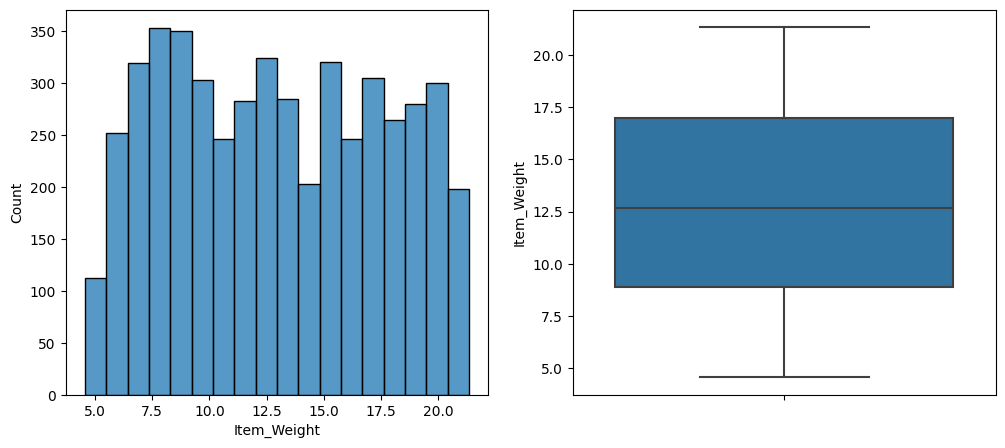

In [ ]:
fig, ax = plt.subplots (1, 2, figsize=(12, 5))
sns.histplot (data=X_train_c, x='Item_Weight', ax=ax[0]);
sns.boxplot (data=X_train_c, y='Item_Weight', ax=ax[1]);

In [ ]:
def visualize_numeric_feature (data_frame, col_name):
  fig, ax = plt.subplots (1, 2, figsize=(12, 5))
  sns.histplot(data=data_frame, x=col_name, ax=ax [0]);
  sns.boxplot(data=data_frame, y=col_name, ax=ax[1]);

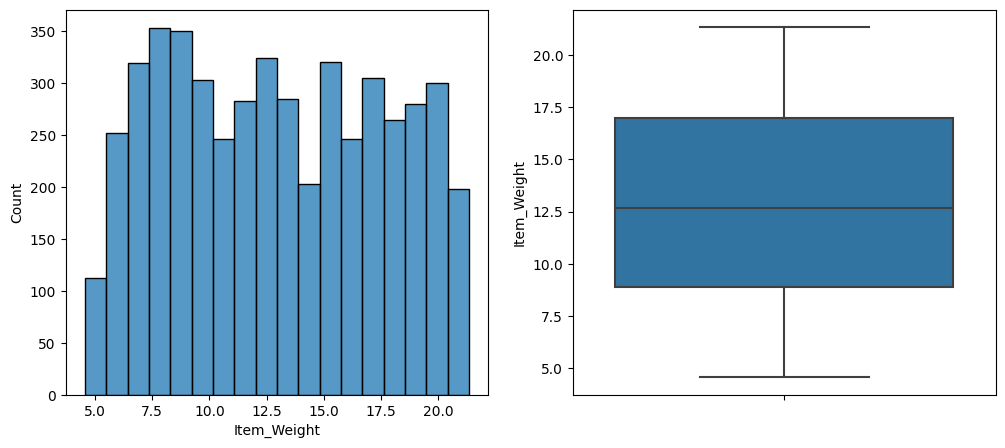

In [ ]:
visualize_numeric_feature (X_train_c, 'Item_Weight')

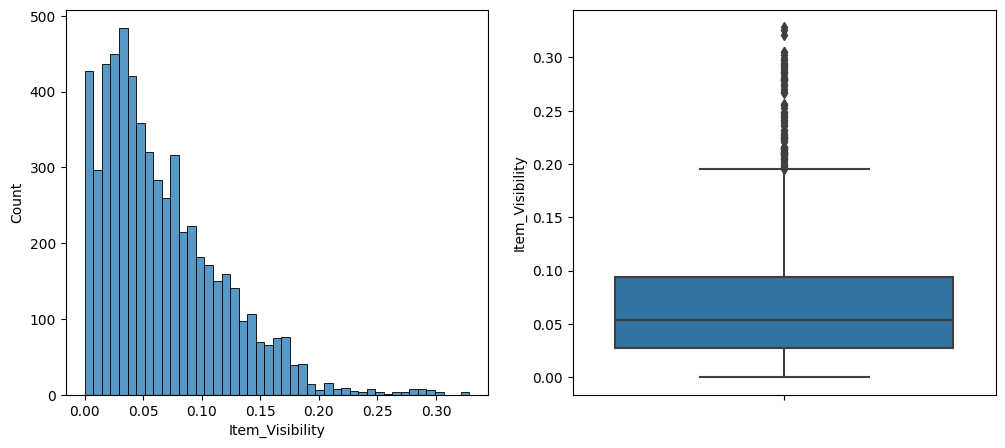

In [ ]:
visualize_numeric_feature(X_train_c, 'Item_Visibility')

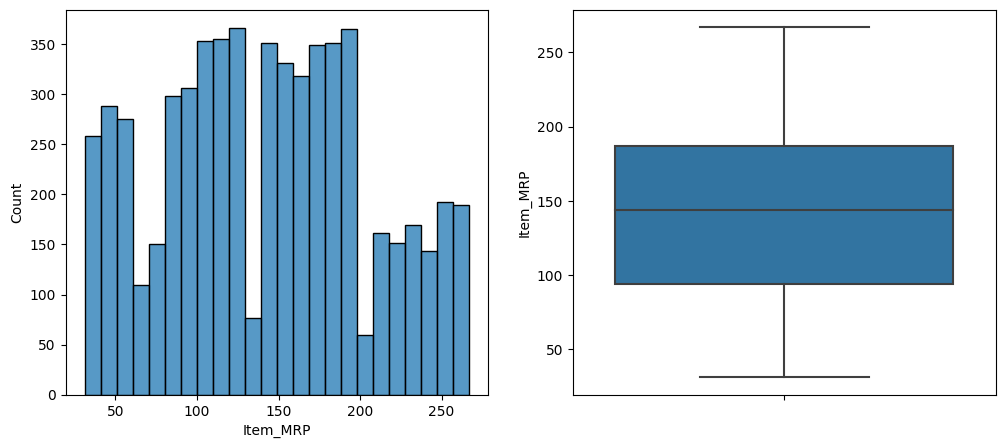

In [ ]:
visualize_numeric_feature (X_train_c, 'Item_MRP')

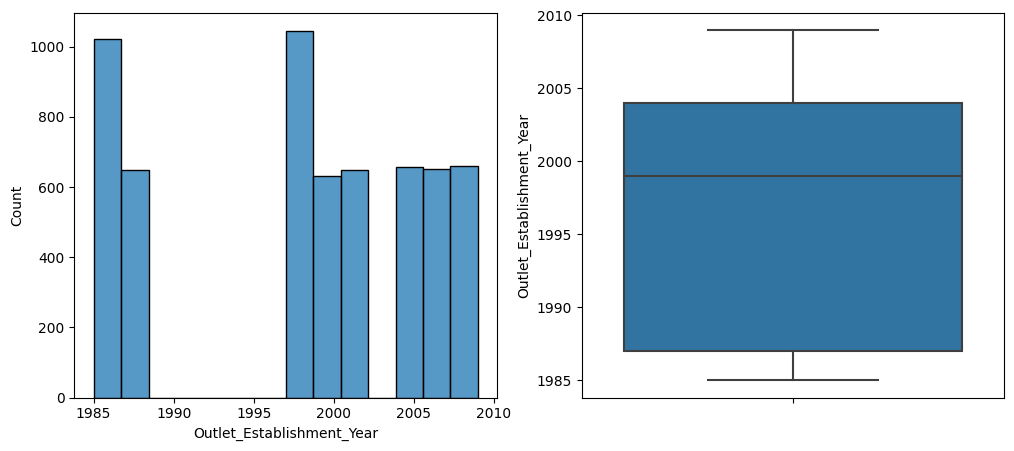

In [ ]:
visualize_numeric_feature (X_train_c, 'Outlet_Establishment_Year')

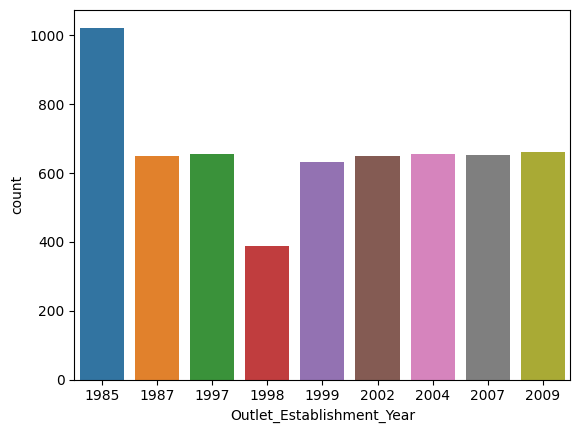

In [ ]:
sns.countplot(data=X_train_c, x='Outlet_Establishment_Year');

In [ ]:
cat_features = X_train_c.select_dtypes (include= ['object'])
cat_features.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
655,NCJ42,Low Fat,Household,OUT046,Small,Tier 1,Supermarket Type1
2229,FDY47,Regular,Breads,OUT027,Medium,Tier 3,Supermarket Type3
2537,FDN45,Low Fat,Snack Foods,OUT045,NaN,Tier 2,Supermarket Type1
3528,FDY16,Regular,Frozen Foods,OUT013,High,Tier 3,Supermarket Type1


In [ ]:
cat_features.describe()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5966,5966,5966,5966,4276,5966,5966
unique,1543,5,16,10,3,3,4
top,NCI54,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,9,3535,905,668,1960,2367,3893


In [ ]:
cat_features.isnull().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             1690
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [ ]:
cat_features['Item_Identifier'].value_counts()

NCI54    9
FDF52    9
FDV60    8
FDT07    8
NCB18    8
        ..
FDT47    1
NCW42    1
DRH59    1
FDV14    1
FDG28    1
Name: Item_Identifier, Length: 1543, dtype: int64

In [ ]:
cat_features['Item_Fat_Content'].value_counts()

Low Fat    3535
Regular    2027
LF          243
low fat      82
reg          79
Name: Item_Fat_Content, dtype: int64

In [ ]:
cat_features['Item_Type'].value_counts()

Fruits and Vegetables    905
Snack Foods              835
Household                648
Frozen Foods             591
Dairy                    474
Canned                   450
Baking Goods             438
Health and Hygiene       365
Soft Drinks              305
Meat                     275
Hard Drinks              162
Breads                   159
Others                   124
Starchy Foods            116
Breakfast                 80
Seafood                   39
Name: Item_Type, dtype: int64

In [ ]:
cat_features [ 'Outlet_Identifier' ].value_counts()

OUT027    668
OUT018    661
OUT046    656
OUT035    656
OUT017    652
OUT045    649
OUT013    649
OUT049    631
OUT010    389
OUT019    355
Name: Outlet_Identifier, dtype: int64

In [ ]:
cat_features [ 'Outlet_Size'].value_counts()

Medium    1960
Small     1667
High       649
Name: Outlet_Size, dtype: int64

In [ ]:
cat_features['Outlet_Location_Type'].value_counts()

Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: Outlet_Location_Type, dtype: int64

In [ ]:
cat_features['Outlet_Location_Type'].value_counts()

Tier 3    2367
Tier 2    1957
Tier 1    1642
Name: Outlet_Location_Type, dtype: int64

### Data Wrangling + Feature Engineering

Step 1: Create High Level Item Types

In [ ]:
X_train_c['Item_Identifier'].apply(lambda x: x[:2])

1921    FD
655     NC
2229    FD
2537    FD
3528    FD
        ..
5734    FD
5191    FD
5390    NC
860     FD
7270    NC
Name: Item_Identifier, Length: 5966, dtype: object

In [ ]:
X_train_c['Item_Identifier'].str[:2].value_counts()

FD    4269
NC    1137
DR     560
Name: Item_Identifier, dtype: int64

In [ ]:
# Step 1: Map Item IDs to Item Types
def create_item_type(data_frame):
   data_frame[ 'Item_Type'] = data_frame[ 'Item_Identifier'].str[:2]
   data_frame['Item_Type'] = data_frame[ 'Item_Type'].map({
                                              'FD': 'Food',
                                              'NC' : 'Non_Consumables',
                                              'DR': 'Drink'
                              })
   return data_frame

In [ ]:
X_train_c = create_item_type(X_train_c)
X_train_c.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
1921,FDN08,7.72,Regular,0.147904,Food,116.6466,OUT010,1998,NaN,Tier 3,Grocery Store
655,NCJ42,19.75,Low Fat,0.014301,Non_Consumables,103.0332,OUT046,1997,Small,Tier 1,Supermarket Type1
2229,FDY47,NaN,Regular,0.054221,Food,129.1310,OUT027,1985,Medium,Tier 3,Supermarket Type3
2537,FDN45,19.35,Low Fat,0.118342,Food,222.6088,OUT045,2002,NaN,Tier 2,Supermarket Type1
3528,FDY16,18.35,Regular,0.092150,Food,184.8266,OUT013,1987,High,Tier 3,Supermarket Type1


## Step 2: Fill in missing values for Item_Weight

In [ ]:
X_train_c.isnull().sum()


Item_Identifier                 0
Item_Weight                  1023
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
X_train_c[['Item_Identifier', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Identifier'])

,Item_Identifier,Item_Weight
1245,DRA12,11.60
4900,DRA24,19.35
6057,DRA59,NaN
1876,DRA59,8.27
3733,DRB01,NaN
...,...,...
411,NCZ42,10.50
2084,NCZ53,NaN
6879,NCZ53,9.60
7926,NCZ54,14.65


In [ ]:
X_train_c[['Item_Type', 'Item_Weight']].drop_duplicates().sort_values(by=['Item_Type'])

,Item_Type,Item_Weight
2796,Drink,5.730
998,Drink,20.250
670,Drink,8.395
6091,Drink,13.500
3438,Drink,13.850
...,...,...
6624,Non_Consumables,12.600
6191,Non_Consumables,8.880
1911,Non_Consumables,19.850
135,Non_Consumables,7.235


In [ ]:
ITEM_ID_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight', index='Item_Identifier').reset_index()
ITEM_ID_WEIGHT_MAPPING = dict(zip(ITEM_ID_WEIGHT_PIVOT['Item_Identifier'], ITEM_ID_WEIGHT_PIVOT['Item_Weight']))
list(ITEM_ID_WEIGHT_MAPPING.items())[:10]

[('DRA12', 11.6),
 ('DRA24', 19.35),
 ('DRA59', 8.27),
 ('DRB01', 7.39),
 ('DRB13', 6.115),
 ('DRB24', 8.785),
 ('DRB25', 12.300000000000002),
 ('DRB48', 16.75),
 ('DRC01', 5.92),
 ('DRC12', 17.85)]

In [ ]:
ITEM_TYPE_WEIGHT_PIVOT = X_train_c.pivot_table(values='Item_Weight', index='Item_Type',
                                            aggfunc='median').reset_index()
ITEM_TYPE_WEIGHT_MAPPING = dict(zip (ITEM_TYPE_WEIGHT_PIVOT['Item_Type'], ITEM_TYPE_WEIGHT_PIVOT['Item_Weight']))
ITEM_TYPE_WEIGHT_MAPPING.items ()

dict_items([('Drink', 11.8), ('Food', 12.8), ('Non_Consumables', 13.05)])

In [ ]:
def impute_item_weight (data_frame):
 # 1st logic item id weight
 data_frame.loc[:, 'Item_Weight'] = data_frame.loc[:, 'Item_Weight'].fillna(data_frame.loc[:, 'Item_Identifier'].map(ITEM_ID_WEIGHT_MAPPING))
 # 2nd logic item type weight if any still missing
 data_frame.loc[:, 'Item_Weight'] = data_frame.loc[:, 'Item_Weight'].fillna(data_frame.loc[:, 'Item_Type' ].map(ITEM_TYPE_WEIGHT_MAPPING))
 return data_frame

In [ ]:
X_train_c = impute_item_weight(X_train_c)

In [ ]:
X_train_c.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1690
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## Fill in missing values for Outlet_Size

In [ ]:
X_train_c.groupby(by=['Outlet_Type', 'Outlet_Size']).size()

Outlet_Type        Outlet_Size
Grocery Store      Small           355
Supermarket Type1  High            649
                   Medium          631
                   Small          1312
Supermarket Type2  Medium          661
Supermarket Type3  Medium          668
dtype: int64

In [ ]:
import numpy as np

# Define the mapping (replace this with your actual mapping)
OUTLET_TYPE_SIZE_MAPPING = {
    'Grocery Store': 'Small',
    'Supermarket Type1': 'Small',
    'Supermarket Type2': 'Medium',
    'Supermarket Type3': 'Medium'
}

def impute_outlet_size(data_array):
    outlet_types = data_array[:, 0]  # Assuming Outlet_Type is the first column
    outlet_sizes = data_array[:, 1]  # Assuming Outlet_Size is the second column

    # Find the indices of missing Outlet_Size
    missing_indices = np.where(outlet_sizes == '')

    # Impute missing Outlet_Size using the mapping
    for idx in missing_indices[0]:
        outlet_type = outlet_types[idx]
        if outlet_type in OUTLET_TYPE_SIZE_MAPPING:
            outlet_sizes[idx] = OUTLET_TYPE_SIZE_MAPPING[outlet_type]

    return data_array

# Sample data (replace this with your actual data)
data = np.array([
    ['Grocery Store', 'Small'],
    ['Supermarket Type1', ''],
    ['Supermarket Type2', 'Medium'],
    ['Supermarket Type3', ''],
])

# Impute missing Outlet_Size
data_with_imputed_sizes = impute_outlet_size(data)

print("Data with Imputed Sizes:")
print(data_with_imputed_sizes)


Data with Imputed Sizes:
[['Grocery Store' 'Small']
 ['Supermarket Type1' 'Small']
 ['Supermarket Type2' 'Medium']
 ['Supermarket Type3' 'Medium']]


In [ ]:
import numpy as np

# Define the mapping (replace this with your actual mapping)
OUTLET_TYPE_SIZE_MAPPING = {
    'Grocery Store': 'Small',
    'Supermarket Type1': 'Small',
    'Supermarket Type2': 'Medium',
    'Supermarket Type3': 'Medium'
}

def impute_outlet_size(data_array):
    outlet_types = data_array[:, 0]  # Assuming Outlet_Type is the first column
    outlet_sizes = data_array[:, 1]  # Assuming Outlet_Size is the second column

    # Find the indices of missing Outlet_Size (represented by empty strings)
    missing_indices = np.where(outlet_sizes == '')

    # Impute missing Outlet_Size using the mapping
    for idx in missing_indices[0]:
        outlet_type = outlet_types[idx]
        if outlet_type in OUTLET_TYPE_SIZE_MAPPING:
            outlet_sizes[idx] = OUTLET_TYPE_SIZE_MAPPING[outlet_type]

    return data_array

# Sample data (replace this with your actual data)
data = np.array([
    ['Grocery Store', 'Small'],
    ['Supermarket Type1', ''],
    ['Supermarket Type2', 'Medium'],
    ['Supermarket Type3', ''],
])

# Impute missing Outlet_Size
data_with_imputed_sizes = impute_outlet_size(data)

print("Data with Imputed Sizes:")
print(data_with_imputed_sizes)


Data with Imputed Sizes:
[['Grocery Store' 'Small']
 ['Supermarket Type1' 'Small']
 ['Supermarket Type2' 'Medium']
 ['Supermarket Type3' 'Medium']]


In [ ]:
import numpy as np

# Sample data (replace this with your actual data)
data = np.array([
    ['Grocery Store', 'Small'],
    ['Supermarket Type1', ''],
    ['Supermarket Type2', 'Medium'],
    ['Supermarket Type3', ''],
])

# Count missing values (empty strings) in Outlet_Size column
missing_values_count = np.sum(data[:, 1] == '')
print("Number of missing values in Outlet_Size:", missing_values_count)


Number of missing values in Outlet_Size: 2
